# LENDING CLUB CASE STUDY


## Problem Statement
You work for a consumer finance company specializing in lending various types of loans to urban customers. When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:<br>
<br>
1- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company<br>
2- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company<br>
<br>
##### The aim is to identify patterns that indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of the loan, lending (to risky applicants) at a higher interest rate, etc.<br>

This EDA study aims to understand how consumer attributes and loan attributes influence the default tendency.of default.


##### It seems to be private data

## Importing the required libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Dataset Reading and Finding basic details 

#### Importing the loan dataset and displaying the first five rows.                                                    
#### Importing with low_memoy = False as we suspect that the automatic data type inference may not be correct

In [10]:
loan = pd.read_csv('loan.csv', low_memory=False)
loan = loan.replace(r'^\s*$', np.nan, regex=True) ## csv file has blank values and pandas may not import these values as NaN.

loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Fetching the shape of loan dataset (rows, columns)

In [12]:
loan.shape

(39717, 111)

#### Fetching the information about index range and column's datatype. The dataset has mixed dataypes for columns

In [14]:
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

#### Fetching Statistical Information for Numerical Variables

In [16]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## NULL VALUES PROCESSING AND DATA CLEANING

#### We will check for the null percentage in each columns

In [19]:
#writing a function null_perc as we may need to check for null values for many times.

def null_perc(df):
    """Returns the dictionary of column name as keys and null percentage values as values
            
            Parameters: 
                df = dataframe

            Returns:
                dictionary of column names as keys and null percentage values as values

                sample: dataframe is 'loan'
                {'verification_status_joint': 100.0,
                 'annual_inc_joint': 100.0,
                 'mo_sin_old_rev_tl_op': 100.0,
                 'mo_sin_old_il_acct': 100.0,
                 'bc_util': 100.0,
                 'bc_open_to_buy': 100.0}
        """
    
    # finding null percentage in each column
    null_percentage = np.round(100*(df.isnull().sum())/df.shape[0],2) 
    
    # sorting the values and creating a dictionary for further processing
    null_dict = dict(null_percentage.sort_values(ascending=False))
    
    return null_dict


In [20]:
initial_nulls = null_perc(loan) ## calling function null_perc to check for intial null values
initial_nulls

{'verification_status_joint': 100.0,
 'annual_inc_joint': 100.0,
 'mo_sin_old_rev_tl_op': 100.0,
 'mo_sin_old_il_acct': 100.0,
 'bc_util': 100.0,
 'bc_open_to_buy': 100.0,
 'avg_cur_bal': 100.0,
 'acc_open_past_24mths': 100.0,
 'inq_last_12m': 100.0,
 'total_cu_tl': 100.0,
 'inq_fi': 100.0,
 'total_rev_hi_lim': 100.0,
 'all_util': 100.0,
 'max_bal_bc': 100.0,
 'open_rv_24m': 100.0,
 'open_rv_12m': 100.0,
 'il_util': 100.0,
 'total_bal_il': 100.0,
 'mths_since_rcnt_il': 100.0,
 'open_il_24m': 100.0,
 'open_il_12m': 100.0,
 'open_il_6m': 100.0,
 'open_acc_6m': 100.0,
 'tot_cur_bal': 100.0,
 'tot_coll_amt': 100.0,
 'mo_sin_rcnt_rev_tl_op': 100.0,
 'mo_sin_rcnt_tl': 100.0,
 'mort_acc': 100.0,
 'num_rev_tl_bal_gt_0': 100.0,
 'total_bc_limit': 100.0,
 'total_bal_ex_mort': 100.0,
 'tot_hi_cred_lim': 100.0,
 'percent_bc_gt_75': 100.0,
 'pct_tl_nvr_dlq': 100.0,
 'num_tl_op_past_12m': 100.0,
 'num_tl_90g_dpd_24m': 100.0,
 'num_tl_30dpd': 100.0,
 'num_tl_120dpd_2m': 100.0,
 'num_sats': 100.0,
 'n

##### Many columns have 100% null values.

In [22]:
## Writing a loop in a function drop_null to drop all the columns with null values>x%
## We may need to drop columns if and when need arise

def drop_null(x, dict, df):
    """Returns None
            
            Parameters: 
                x: percentage null values
                dict: dictionary of column names as keys and null percentage values as values
                df = dataframe

            Returns:
               None

    """
    
    for i, j in dict.items():
        if j>x:
            df.drop(i, inplace=True, axis=1)

In [23]:
## Calling drop_null function to drop columns with >50% null values and then check further
drop_null(50, initial_nulls, loan)

In [24]:
## Rechecking for shape. Now it has (rows,columns) = (39717, 54)
loan.shape

(39717, 54)

In [25]:
nulls_after_50perc_removal = null_perc(loan) ## calling function null_perc to check for null values again
nulls_after_50perc_removal

{'desc': 33.11,
 'emp_title': 6.19,
 'emp_length': 2.71,
 'pub_rec_bankruptcies': 1.75,
 'last_pymnt_d': 0.18,
 'collections_12_mths_ex_med': 0.14,
 'chargeoff_within_12_mths': 0.14,
 'revol_util': 0.13,
 'tax_liens': 0.1,
 'title': 0.03,
 'last_credit_pull_d': 0.01,
 'total_rec_prncp': 0.0,
 'out_prncp': 0.0,
 'initial_list_status': 0.0,
 'out_prncp_inv': 0.0,
 'total_acc': 0.0,
 'total_pymnt': 0.0,
 'total_pymnt_inv': 0.0,
 'collection_recovery_fee': 0.0,
 'total_rec_int': 0.0,
 'total_rec_late_fee': 0.0,
 'recoveries': 0.0,
 'pub_rec': 0.0,
 'last_pymnt_amnt': 0.0,
 'policy_code': 0.0,
 'application_type': 0.0,
 'acc_now_delinq': 0.0,
 'delinq_amnt': 0.0,
 'revol_bal': 0.0,
 'id': 0.0,
 'open_acc': 0.0,
 'member_id': 0.0,
 'loan_amnt': 0.0,
 'funded_amnt': 0.0,
 'funded_amnt_inv': 0.0,
 'term': 0.0,
 'int_rate': 0.0,
 'installment': 0.0,
 'grade': 0.0,
 'sub_grade': 0.0,
 'home_ownership': 0.0,
 'annual_inc': 0.0,
 'verification_status': 0.0,
 'issue_d': 0.0,
 'loan_status': 0.0,
 '

*After importing the dataset and removing columns with greater than 50% null values, we have identified that only the 'desc' column contains null values exceeding 30%. We recommend retaining this column due to the potential importance of the available descriptions. The remaining columns exhibit null values ranging from 0% to 7%. Consequently, we will not proceed with the imputation or removal of any additional null rows or columns at this stage. Our next step will be to analyze these columns further.*

#### Analysing columns which have null values

"desc": We will keep it unchanged. Adding our description or imputing with a 'mode' value could potentially skew the study.<br>
"emp_title": It might affect our study, but we won't impute it because we want to assess the impact of the absence of emp_length on defaults.<br>
"emp_length": It might affect our study, but we won't impute it because we want to assess the impact of the absence of emp_length on defaults.<br>
"pub_rec_bankruptcies": We would likely replace null values with zero or opt not to impute it at all. If data isn't available, we can safely assume that there are no records.<br>
"last_pymnt_d": Skipping this column, so we will keep it unchanged.<br>
"collections_12_mths_ex_med": Skipping this column, so we will keep it unchanged.<br>
"chargeoff_within_12_mths": Skipping this column, so we will keep it unchanged.<br>
"revol_util": We might have to impute using mode values.<br>
"tax_liens": Skipping this column, so we will keep it unchanged.<br>
"title": Skipping this column, so we will keep it unchanged.<br>
"last_credit_pull_d": Skipping this column, so we will keep it unchanged.<br>

## DATA FILTERING 

#### Check for duplicates

In [31]:
loan[loan.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


So we do not have any duplicates

#### Types of Variable Analysis AND Filtering Columns Required for Analysis

In [34]:
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

**Unorderd Categorical and Nominal Variables = ucnv**

In [36]:
ucnv = ['member_id', 'home_ownership', 'verification_status', 'loan_status', 'purpose']        

**orderd Categorical and Ordinal Variables = ocov**

In [38]:
ocov = ['term', 'grade', 'sub_grade', 'emp_length']

**Numeric and Ratio Variables = nrv**

In [40]:
nrv= ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',	
      'pub_rec', 'revol_util', 'pub_rec_bankruptcies']


## Data Standardization

In [42]:
## Will convert 'int_rate' (interest rate) to numeric type and remove '%' sign. Currently it is 'object' type which is wrong.

loan['int_rate'] = loan['int_rate'].apply(lambda x: float(x[0:-1]))

In [43]:
loan['int_rate'].dtype

dtype('float64')

In [44]:
## Filling null values of 'revol_util' with mode as it is currently object type

mode_revol_util = loan['revol_util'].mode()
loan['revol_util'] = loan['revol_util'].fillna(mode_revol_util)

In [45]:
## Will convert 'revol_util' (Revolving balance utility rate) to numeric type and remove '%' sign. 
##Currently it is 'object' type which is wrong.


loan['revol_util'] = loan['revol_util'].apply(lambda x: str(x)) ## Since it already has some float values. We need to perform below action
loan['revol_util'] = loan['revol_util'].apply(lambda x: float(x.strip('%'))) ## converting each value to float and stripping the % symbol

In [46]:
loan['revol_util'].dtype

dtype('float64')

## UNIVARAITE ANALYSIS

### Numerical Variables

#### Are all members unique?
##### The count matches with total rows of dataset, hence all are unique

In [50]:
loan['member_id'].nunique() 

39717

#### Loan Amount Distribution

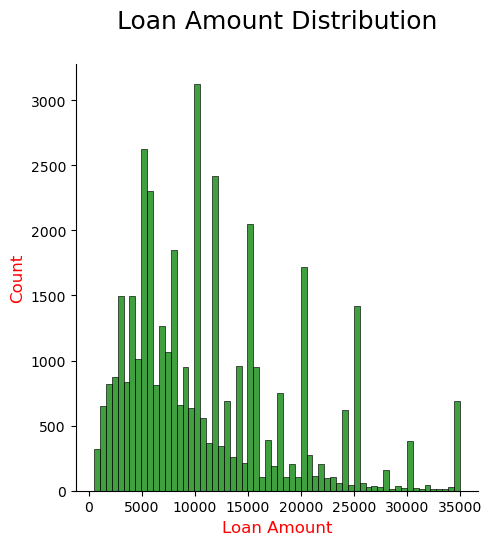

In [52]:
sns.displot(data = loan, x = 'loan_amnt', kde= False, color = 'green')
plt.title("Loan Amount Distribution\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'black'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Loan Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

#####  Loan Amount has few outliers as predicted in box plot below. 
###### We will retain these outliers since it's possible that they could be potential defaulters.
###### Based on the distribution plot above, it is clear that these outliers cannot be overlooked.

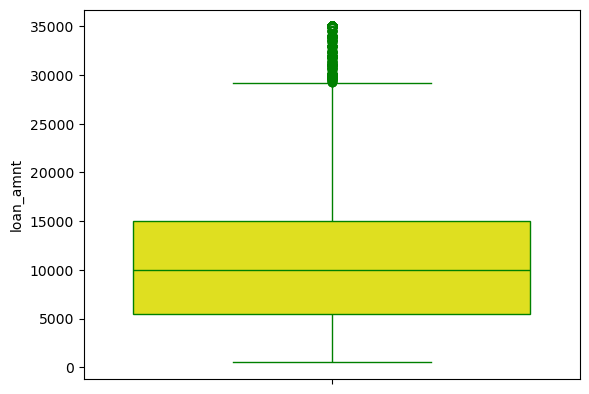

In [54]:
sns.boxplot(data = loan, y = 'loan_amnt', color = 'yellow', linecolor = 'green')
plt.show()

#### Interest Rates

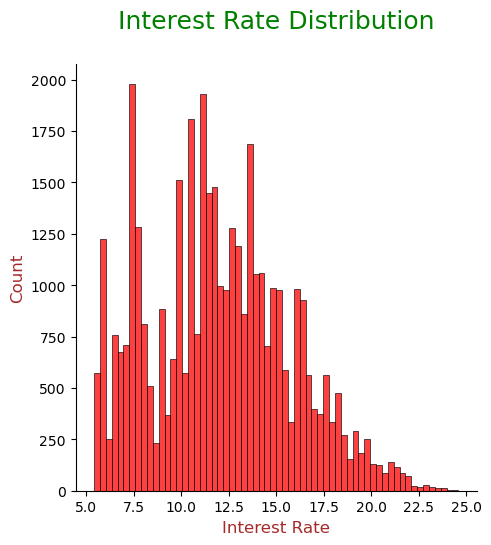

In [56]:
sns.displot(data = loan, x = 'int_rate', kde= False, color = 'red')
plt.title("Interest Rate Distribution\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'brown'})
plt.xlabel("Interest Rate", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'brown'})
plt.show()

#####  Interest Rate also has few outliers as predicted in box plot below. 
###### We will retain these outliers since it's possible that they could be reason for potential defaulters.
###### Given the distribution plot presented above, it is evident that these outlier counts should not be ignored.

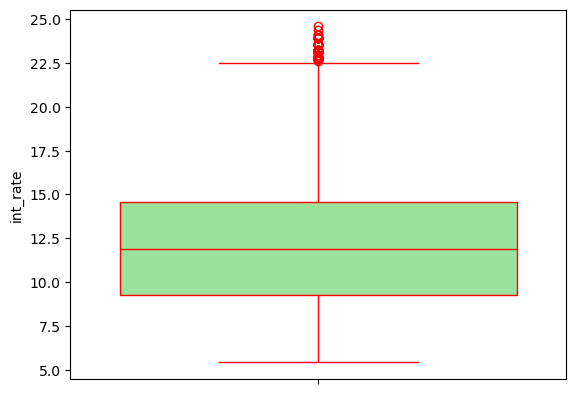

In [58]:
sns.boxplot(data = loan, y = 'int_rate', color = 'lightgreen', linecolor = 'red')
plt.show()

#### Revolving Utilities 

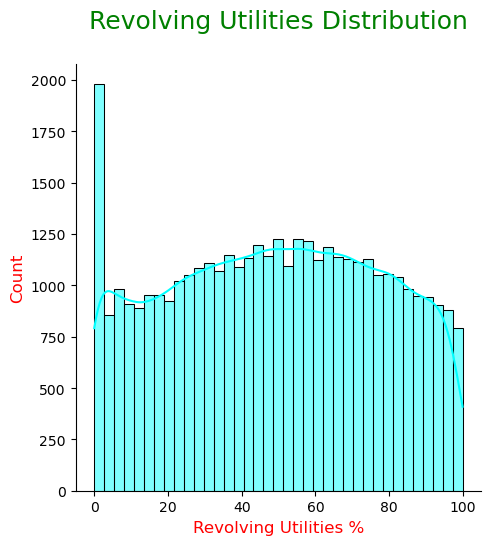

In [60]:
sns.displot(data = loan, x = 'revol_util', kde= True, color = 'cyan')
plt.title("Revolving Utilities Distribution\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Revolving Utilities %", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

#####  Revolving Utilities seems to have no outliers as predicted in box plot below. 
##### Based on the distribution plot shown above, it appears that the number of members with 0% revolving utilization is the greatest.

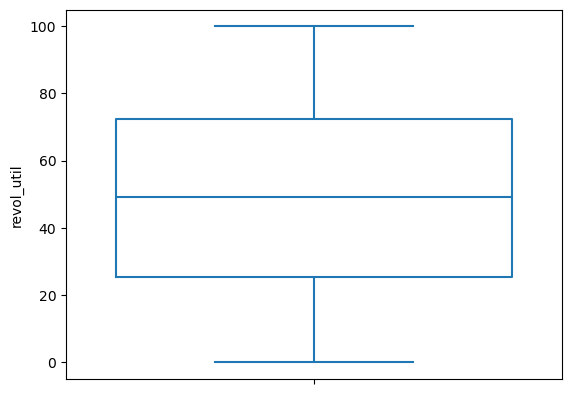

In [62]:
sns.boxplot(data = loan, y = 'revol_util', fill= False)
plt.show()

#### Installments

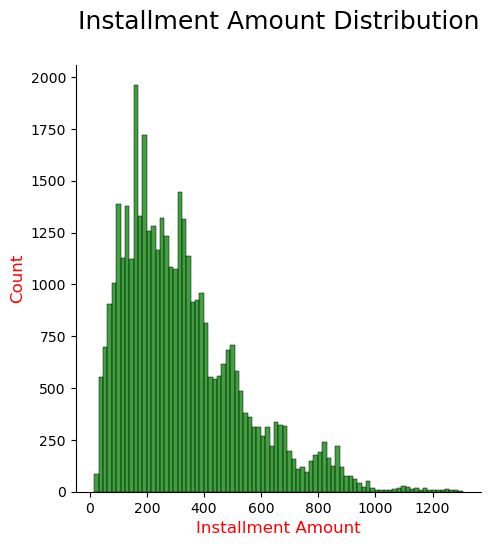

In [64]:
sns.displot(data = loan, x = 'installment', kde= False, color = 'green')
plt.title("Installment Amount Distribution\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'black'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Installment Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

#####  Installment Amount also has quite a few outliers as predicted in box plot below. 
###### We will retain these outliers since it's highly possible that they could be reason for potential defaulters.
###### Given the distribution plot presented above, it is evident that these outlier counts should not be ignored at all.

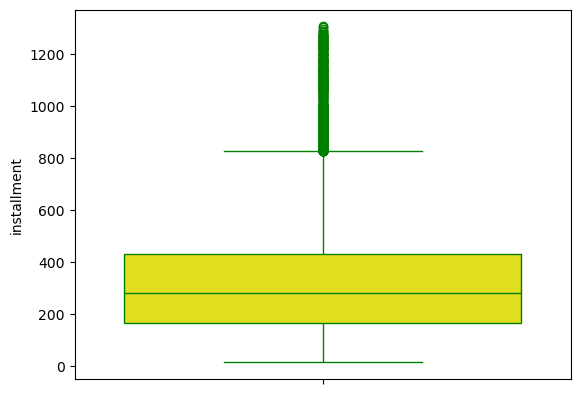

In [66]:
sns.boxplot(data = loan, y = 'installment', color = 'yellow', linecolor = 'green')
plt.show()

#### <font color = 'Red'>Other Numerical Variables such as 'dti', 'delinq_2yrs', 'inq_last_6mths',	pub_rec', 'revol_util', 'pub_rec_bankruptcies' ought to be considered in their raw form. Modifying these could result in potentially inaccurate analyses.

### Categorical Variables

##### We will gain insight about the variables (mostly about count of different buckets under required variables)

##### Loan term analysis. Mostly members have opted for 36 month tenure

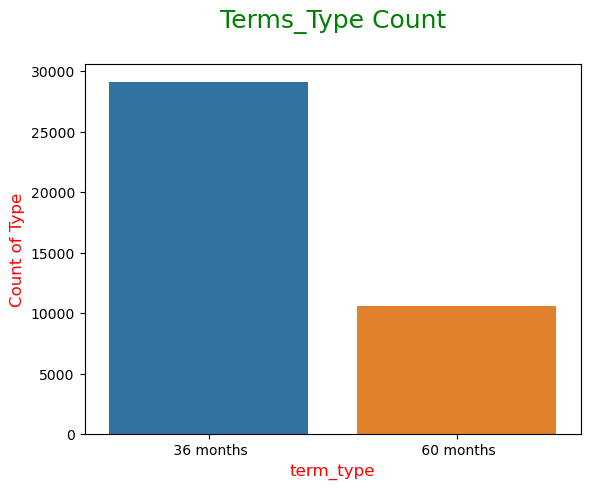

In [71]:
sns.countplot(data=loan, x='term', hue = 'term', legend = False)
plt.title("Terms_Type Count\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of Type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("term_type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

##### Customer grade analysis. Mostly are in grades A and B

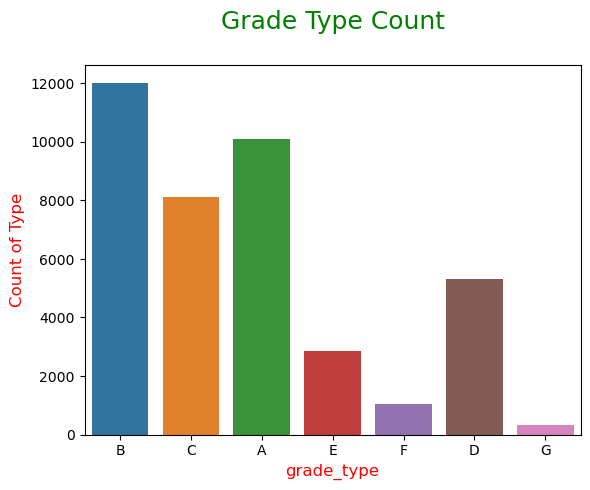

In [73]:
sns.countplot(data=loan, x='grade', hue = 'grade', legend = False)
plt.title("Grade Type Count\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of Type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("grade_type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

##### member's employment length analysis. Mostly have 10+ year of employment length

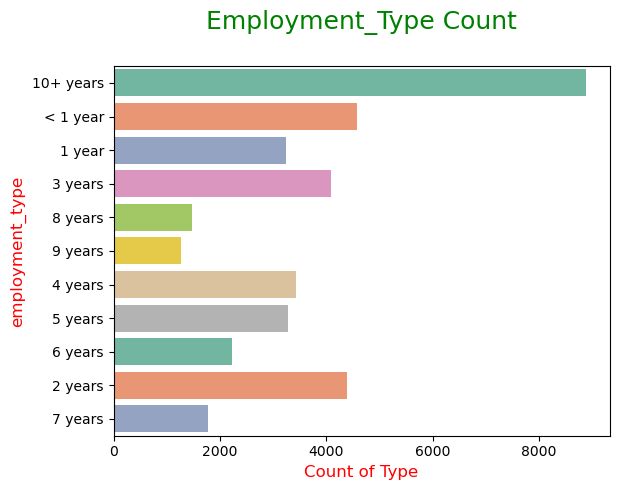

In [75]:
sns.countplot(data=loan, y='emp_length', hue = 'emp_length', palette='Set2', legend = False)
plt.title("Employment_Type Count\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Count of Type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.ylabel("employment_type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

##### member's verification status. Not verified percenatge is somewhat higher

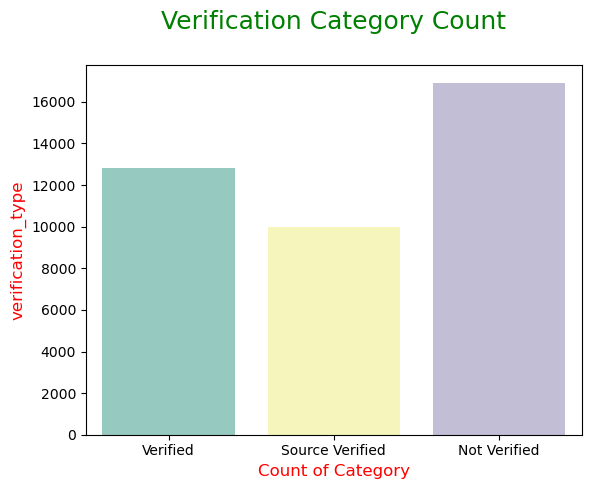

In [77]:
sns.countplot(data=loan, x='verification_status', hue = 'verification_status', legend = False, palette='Set3' )
plt.title("Verification Category Count\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Count of Category", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.ylabel("verification_type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

##### purpose of loan. Why members have taken loan? debt consolidation purpose is very high 

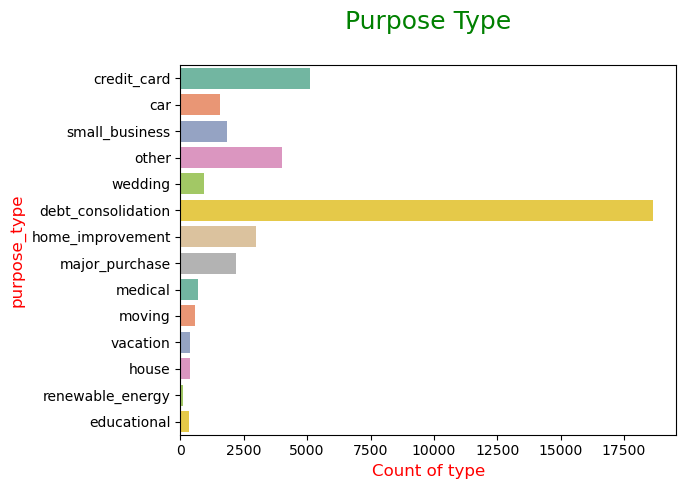

In [79]:
sns.countplot(data=loan, y='purpose', hue = 'purpose', legend = False, palette='Set2')
plt.title("Purpose Type\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Count of type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.ylabel("purpose_type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

##### member's home ownership type. Mostly members have status as Rent or Mortage

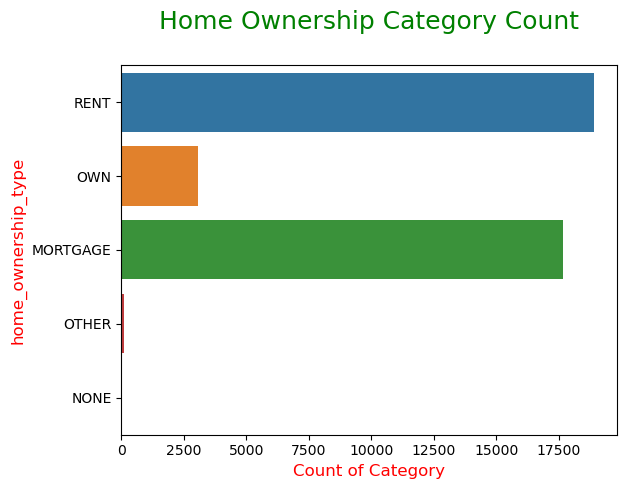

In [81]:
sns.countplot(data=loan, y='home_ownership', hue = 'home_ownership', legend = False)
plt.title("Home Ownership Category Count\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Count of Category", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.ylabel("home_ownership_type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

## BIVARIATE ANALYSIS

#### Univariate analysis provided insight about the variables but count of variables may not be good for analysing
###### Our primary focus will be on percentage figures. Total values might lead to incorrect conclusions since we need to analyze which types of customers are likely to default. It’s possible that a particular group of members has received larger loans. Therefore, it is quite likely that while the number of defaults may be high, the percentage of those members could be low.

##### Loan Term Vs Loan Status

In [85]:
## Creating pivot table with columns 'term' and loan_status and aggregating on member count
## resetting index to have a dataframe
loan_term_vs_loan_status_pivot = loan.pivot_table(index='term', columns = 'loan_status', values='member_id', aggfunc='count')
loan_term_vs_loan_status = loan_term_vs_loan_status_pivot.reset_index()
loan_term_vs_loan_status

loan_status,term,Charged Off,Current,Fully Paid
0,36 months,3227.0,NaN,25869.0
1,60 months,2400.0,1140.0,7081.0


In [86]:
## We need percentage of how many charged off in each term. We will let the NaN values be zero and then calculate %.

loan_term_vs_loan_status.loc[0, 'Current'] = 0
loan_term_vs_loan_status['percentage_charged_off']= 100*loan_term_vs_loan_status['Charged Off']/(loan_term_vs_loan_status['Charged Off'] + 
                                                                                loan_term_vs_loan_status['Current'] + 
                                                                                loan_term_vs_loan_status['Fully Paid'])
loan_term_vs_loan_status


loan_status,term,Charged Off,Current,Fully Paid,percentage_charged_off
0,36 months,3227.0,0.0,25869.0,11.090872
1,60 months,2400.0,1140.0,7081.0,22.596742


##### <font color = 'Magenta'> We observe that a tenure of 60 months has a higher percentage of charged-off cases, so this tenure should be avoided. Additionally, it is the category that has current pending cases.

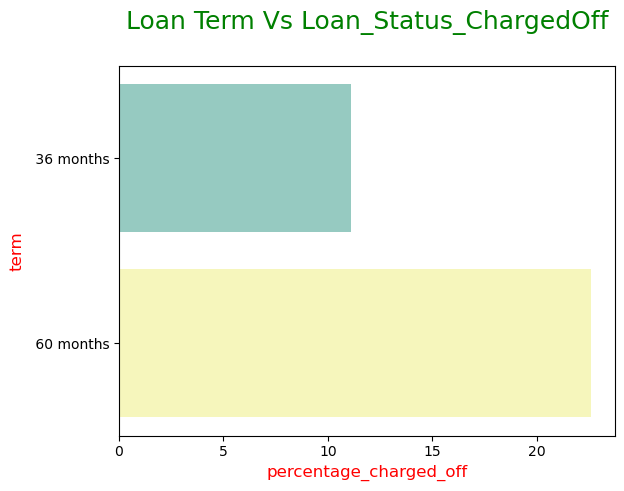

In [88]:
sns.barplot(data = loan_term_vs_loan_status, y = 'term', x = 'percentage_charged_off', hue = 'term', legend = False, palette='Set3')
plt.title("Loan Term Vs Loan_Status_ChargedOff\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("percentage_charged_off", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.ylabel("term", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

##### Grade vs Loan_status

In [90]:
## Creating pivot table with columns 'grade' and loan_status and aggregating on member count
## resetting index to have a dataframe

grade_vs_loan_status_pivot = loan.pivot_table(index='grade', columns = 'loan_status', values='member_id', aggfunc='count')
grade_vs_loan_status = grade_vs_loan_status_pivot.reset_index()
grade_vs_loan_status

loan_status,grade,Charged Off,Current,Fully Paid
0,A,602,40,9443
1,B,1425,345,10250
2,C,1347,264,6487
3,D,1118,222,3967
4,E,715,179,1948
5,F,319,73,657
6,G,101,17,198


In [91]:
## We need percentage of how many charged off in each term. We will let the NaN values be zero if any and then calculate %.

grade_vs_loan_status['percentage_charged_off']= 100*grade_vs_loan_status['Charged Off']/(grade_vs_loan_status['Charged Off'] + 
                                                                                grade_vs_loan_status['Current'] + 
                                                                                grade_vs_loan_status['Fully Paid'])
grade_vs_loan_status

loan_status,grade,Charged Off,Current,Fully Paid,percentage_charged_off
0,A,602,40,9443,5.969261
1,B,1425,345,10250,11.855241
2,C,1347,264,6487,16.633737
3,D,1118,222,3967,21.066516
4,E,715,179,1948,25.158339
5,F,319,73,657,30.409914
6,G,101,17,198,31.962025


##### <font color = 'MAGENTA'>It has come to our attention that grades G, F, and E exhibit a higher percentage of charged-off cases. Therefore, it is advisable to steer clear of members with these grades. 

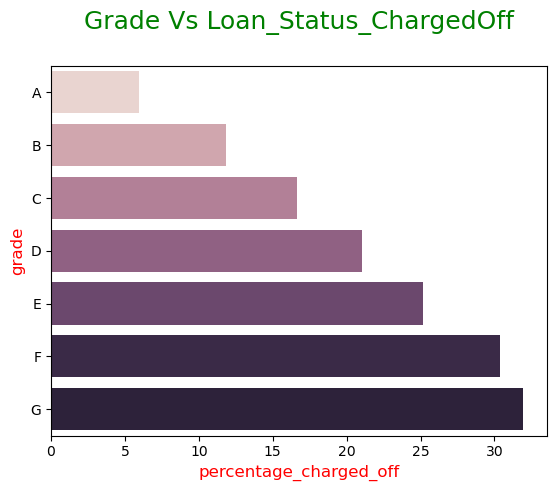

In [93]:
sns.barplot(data = grade_vs_loan_status, x = 'percentage_charged_off', y = 'grade', hue = 'percentage_charged_off', legend = False)
plt.title("Grade Vs Loan_Status_ChargedOff\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("percentage_charged_off", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.ylabel("grade", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

##### Subgrade Vs Loan_Status

In [95]:
## Creating pivot table with columns 'subgrade' and loan_status and aggregating on member count
## resetting index to have a dataframe

subgrade_vs_loan_status_pivot = loan.pivot_table(index='sub_grade', columns = 'loan_status', values='member_id', aggfunc='count')
subgrade_vs_loan_status = subgrade_vs_loan_status_pivot.reset_index()
subgrade_vs_loan_status

loan_status,sub_grade,Charged Off,Current,Fully Paid
0,A1,30.0,NaN,1109.0
1,A2,74.0,NaN,1434.0
2,A3,103.0,NaN,1707.0
3,A4,178.0,13.0,2695.0
4,A5,217.0,27.0,2498.0
5,B1,171.0,33.0,1626.0
6,B2,228.0,56.0,1773.0
7,B3,341.0,92.0,2484.0
8,B4,329.0,75.0,2108.0
9,B5,356.0,89.0,2259.0


In [96]:
## We need percentage of how many charged off in each term. We will let the NaN values be zero if any and then calculate %.

subgrade_vs_loan_status.loc[0, 'Current'] = 0
subgrade_vs_loan_status.loc[1, 'Current'] = 0
subgrade_vs_loan_status.loc[2, 'Current'] = 0
subgrade_vs_loan_status.loc[15, 'Current'] = 0

subgrade_vs_loan_status['percentage_charged_off']= 100*subgrade_vs_loan_status['Charged Off']/(subgrade_vs_loan_status['Charged Off'] + 
                                                                                subgrade_vs_loan_status['Current'] + 
                                                                                subgrade_vs_loan_status['Fully Paid'])

subgrade_vs_loan_status_sorted = subgrade_vs_loan_status.sort_values('percentage_charged_off', ascending = False)
subgrade_vs_loan_status_sorted

loan_status,sub_grade,Charged Off,Current,Fully Paid,percentage_charged_off
29,F5,54.0,5.0,59.0,45.762712
32,G3,19.0,3.0,26.0,39.583333
31,G2,28.0,1.0,49.0,35.897436
34,G5,10.0,1.0,19.0,33.333333
28,F4,53.0,17.0,98.0,31.547619
30,G1,31.0,10.0,63.0,29.807692
26,F2,70.0,16.0,163.0,28.112450
23,E4,126.0,30.0,298.0,27.753304
25,F1,91.0,24.0,214.0,27.659574
27,F3,51.0,11.0,123.0,27.567568


##### <font color = 'MAGENTA'>It has been observed that subgrades G, F, and E exhibit a higher percentage of charged-off cases. Therefore, it is advisable to avoid members from these subgrades. In summary, grades G, F, and E should be avoided.

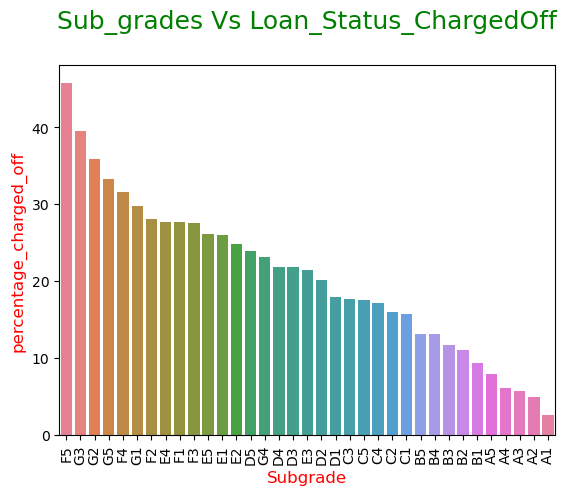

In [98]:
sns.barplot(data = subgrade_vs_loan_status_sorted, x = 'sub_grade', y = 'percentage_charged_off', hue = 'sub_grade', legend = False)
plt.xticks(rotation = 90)
plt.title("Sub_grades Vs Loan_Status_ChargedOff\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("percentage_charged_off", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Subgrade", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

##### Purpose vs Loan_Status

In [100]:
## Creating pivot table with columns 'purpose' and loan_status and aggregating on member count
## resetting index to have a dataframe

purpose_vs_loan_status_pivot = loan.pivot_table(index='purpose', columns='loan_status', values='member_id', aggfunc='count')
purpose_vs_loan_status = purpose_vs_loan_status_pivot.reset_index()
purpose_vs_loan_status

loan_status,purpose,Charged Off,Current,Fully Paid
0,car,160.0,50.0,1339.0
1,credit_card,542.0,103.0,4485.0
2,debt_consolidation,2767.0,586.0,15288.0
3,educational,56.0,NaN,269.0
4,home_improvement,347.0,101.0,2528.0
5,house,59.0,14.0,308.0
6,major_purchase,222.0,37.0,1928.0
7,medical,106.0,12.0,575.0
8,moving,92.0,7.0,484.0
9,other,633.0,128.0,3232.0


In [101]:
## We need percentage of how many charged off in each term. We will let the NaN values be zero if any and then calculate %.

purpose_vs_loan_status.loc[3, 'Current'] = 0

purpose_vs_loan_status['percentage_charged_off']= 100*purpose_vs_loan_status['Charged Off']/(purpose_vs_loan_status['Charged Off'] + 
                                                                                purpose_vs_loan_status['Current'] + 
                                                                                purpose_vs_loan_status['Fully Paid'])

purpose_vs_loan_status_sorted = purpose_vs_loan_status.sort_values('percentage_charged_off', ascending = False)
purpose_vs_loan_status_sorted

loan_status,purpose,Charged Off,Current,Fully Paid,percentage_charged_off
11,small_business,475.0,74.0,1279.0,25.984683
10,renewable_energy,19.0,1.0,83.0,18.446602
3,educational,56.0,0.0,269.0,17.230769
9,other,633.0,128.0,3232.0,15.852742
8,moving,92.0,7.0,484.0,15.780446
5,house,59.0,14.0,308.0,15.485564
7,medical,106.0,12.0,575.0,15.295815
2,debt_consolidation,2767.0,586.0,15288.0,14.843624
12,vacation,53.0,6.0,322.0,13.910761
4,home_improvement,347.0,101.0,2528.0,11.659946


##### <font color = 'MAGENTA'>We observe that loans taken for small business and renewable energy purposes exhibit a higher percentage of charge-offs. Consequently, it may be wise to steer clear of loans for these purposes if feasible. We will conduct a more in-depth analysis in the coming stages using derived metrics.

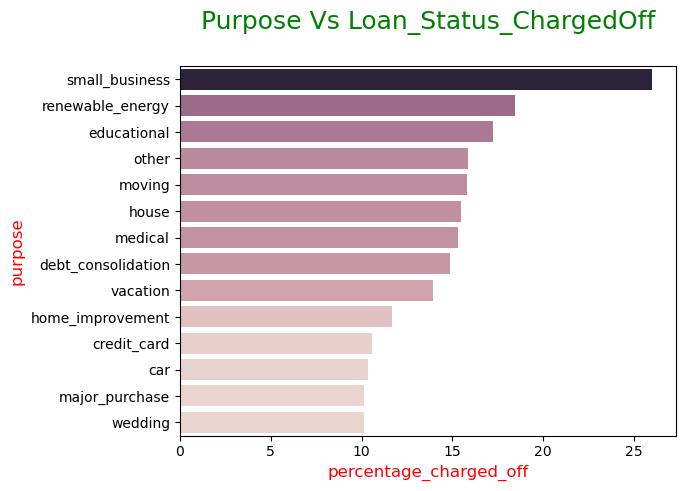

In [103]:
sns.barplot(data = purpose_vs_loan_status_sorted, x = 'percentage_charged_off', y = 'purpose', hue = 'percentage_charged_off', legend = False )
plt.title("Purpose Vs Loan_Status_ChargedOff\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("percentage_charged_off", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.ylabel("purpose", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

##### Employment Length Vs Loan_Status

In [105]:
## Creating pivot table with columns 'emp_length' and loan_status and aggregating on member count
## resetting index to have a dataframe

emp_len_vs_loan_status_pivot = loan.pivot_table(index='emp_length', columns='loan_status', values='member_id', aggfunc='count')
emp_len_vs_loan_status = emp_len_vs_loan_status_pivot.reset_index()
emp_len_vs_loan_status

loan_status,emp_length,Charged Off,Current,Fully Paid
0,1 year,456,71,2713
1,10+ years,1331,391,7157
2,2 years,567,97,3724
3,3 years,555,83,3457
4,4 years,462,94,2880
5,5 years,458,88,2736
6,6 years,307,61,1861
7,7 years,263,62,1448
8,8 years,203,44,1232
9,9 years,158,32,1068


In [106]:
## We need percentage of how many charged off in each term. We will let the NaN values be zero if any and then calculate %.

emp_len_vs_loan_status['percentage_charged_off']= 100*emp_len_vs_loan_status['Charged Off']/(emp_len_vs_loan_status['Charged Off'] + 
                                                                                emp_len_vs_loan_status['Current'] + 
                                                                                emp_len_vs_loan_status['Fully Paid'])

emp_len_vs_loan_status_sorted = emp_len_vs_loan_status.sort_values('percentage_charged_off', ascending = False)
emp_len_vs_loan_status_sorted

loan_status,emp_length,Charged Off,Current,Fully Paid,percentage_charged_off
1,10+ years,1331,391,7157,14.990427
7,7 years,263,62,1448,14.833615
0,1 year,456,71,2713,14.074074
5,5 years,458,88,2736,13.954906
10,< 1 year,639,75,3869,13.942832
6,6 years,307,61,1861,13.772992
8,8 years,203,44,1232,13.725490
3,3 years,555,83,3457,13.553114
4,4 years,462,94,2880,13.445867
2,2 years,567,97,3724,12.921604


##### <font color = 'RED'>There isn't much we can conclude from the examination of emp_length in relation to loan_status. However, emp_length might be beneficial in the analysis of derived metrics.

##### House Ownership Vs Loan Status

In [109]:
## Creating pivot table with columns 'home_ownership' and loan_status and aggregating on member count
## resetting index to have a dataframe

home_ownership_vs_loan_status_pivot = loan.pivot_table(index='home_ownership', columns='loan_status', values='member_id', aggfunc='count')
home_ownership_vs_loan_status = home_ownership_vs_loan_status_pivot.reset_index()
home_ownership_vs_loan_status

loan_status,home_ownership,Charged Off,Current,Fully Paid
0,MORTGAGE,2327.0,638.0,14694.0
1,NONE,NaN,NaN,3.0
2,OTHER,18.0,NaN,80.0
3,OWN,443.0,83.0,2532.0
4,RENT,2839.0,419.0,15641.0


In [110]:
## We need percentage of how many charged off in each term. We will let the NaN values be zero if any and then calculate %.

home_ownership_vs_loan_status.loc[1, 'Charged Off'] = 0
home_ownership_vs_loan_status.loc[2, 'Current'] = 0
home_ownership_vs_loan_status.loc[1, 'Current'] = 0

home_ownership_vs_loan_status['percentage_charged_off']= 100*home_ownership_vs_loan_status['Charged Off']/(home_ownership_vs_loan_status['Charged Off'] + 
                                                                               home_ownership_vs_loan_status['Current'] + 
                                                                                home_ownership_vs_loan_status['Fully Paid'])

home_ownership_vs_loan_status_sorted = home_ownership_vs_loan_status.sort_values('percentage_charged_off', ascending = False)
home_ownership_vs_loan_status_sorted

loan_status,home_ownership,Charged Off,Current,Fully Paid,percentage_charged_off
2,OTHER,18.0,0.0,80.0,18.367347
4,RENT,2839.0,419.0,15641.0,15.021959
3,OWN,443.0,83.0,2532.0,14.486593
0,MORTGAGE,2327.0,638.0,14694.0,13.177417
1,NONE,0.0,0.0,3.0,0.000000


##### <font color = 'MAGENTA'>We observe that when home ownership is marked as unknown (other), those individuals are more likely to be charged off.

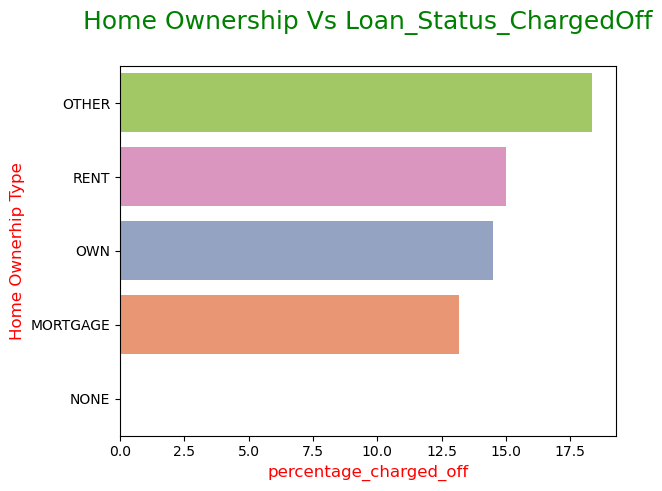

In [112]:
sns.barplot(data = home_ownership_vs_loan_status_sorted, x = 'percentage_charged_off', y = 'home_ownership', hue = 'percentage_charged_off',
           legend = False, palette = 'Set2')
plt.title("Home Ownership Vs Loan_Status_ChargedOff\n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("percentage_charged_off", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.ylabel("Home Ownerhip Type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

## DERIVED METRICS ANALYSIS

#### Variables: Loan Term, Loan Status and Employment Length

In [115]:
## Adding a new column "emp_len&Term" to loan dataset

loan["emp_len&Term"] = loan['emp_length'] + loan['term']

In [116]:
## Creating pivot table with columns "emp_len&Term" and loan_status and aggregating on member count
## resetting index to have a dataframe

emp_len_Term_vs_loan_status_pivot = loan.pivot_table(index="emp_len&Term", columns='loan_status', values='member_id', aggfunc='count')
emp_len_Term_vs_loan_status = emp_len_Term_vs_loan_status_pivot.reset_index()
emp_len_Term_vs_loan_status

loan_status,emp_len&Term,Charged Off,Current,Fully Paid
0,1 year 36 months,302.0,NaN,2282.0
1,1 year 60 months,154.0,71.0,431.0
2,10+ years 36 months,630.0,NaN,5209.0
3,10+ years 60 months,701.0,391.0,1948.0
4,2 years 36 months,356.0,NaN,3057.0
5,2 years 60 months,211.0,97.0,667.0
6,3 years 36 months,332.0,NaN,2760.0
7,3 years 60 months,223.0,83.0,697.0
8,4 years 36 months,279.0,NaN,2281.0
9,4 years 60 months,183.0,94.0,599.0


In [117]:
## We need percentage of how many charged off in each term. We will let the NaN values be zero if any and then calculate %.

for i in np.arange(emp_len_Term_vs_loan_status.shape[0]):
    if pd.isnull(emp_len_Term_vs_loan_status.loc[i,'Current']) == True:
        emp_len_Term_vs_loan_status.loc[i,'Current'] = 0
    
emp_len_Term_vs_loan_status['percentage_charged_off']= 100*emp_len_Term_vs_loan_status['Charged Off']/(emp_len_Term_vs_loan_status['Charged Off'] + 
                                                                               emp_len_Term_vs_loan_status['Current'] + 
                                                                                emp_len_Term_vs_loan_status['Fully Paid'])

emp_len_Term_vs_loan_status_sorted = emp_len_Term_vs_loan_status.sort_values('percentage_charged_off', ascending = False)
emp_len_Term_vs_loan_status_sorted

loan_status,emp_len&Term,Charged Off,Current,Fully Paid,percentage_charged_off
15,7 years 60 months,129.0,62.0,331.0,24.712644
1,1 year 60 months,154.0,71.0,431.0,23.475610
21,< 1 year 60 months,210.0,75.0,619.0,23.230088
3,10+ years 60 months,701.0,391.0,1948.0,23.059211
11,5 years 60 months,207.0,88.0,636.0,22.234157
7,3 years 60 months,223.0,83.0,697.0,22.233300
5,2 years 60 months,211.0,97.0,667.0,21.641026
17,8 years 60 months,92.0,44.0,294.0,21.395349
13,6 years 60 months,142.0,61.0,461.0,21.385542
19,9 years 60 months,74.0,32.0,248.0,20.903955


##### <font color = 'MAGENTA'> The data indicates that a 60-month tenure has a significant rate of charge-offs, regardless of employment length. Therefore, it is advisable to steer clear of offering a 60-month tenure.

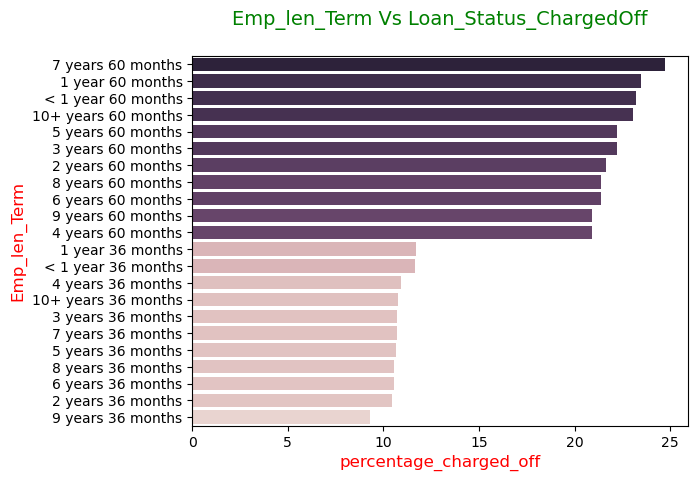

In [119]:
sns.barplot(data = emp_len_Term_vs_loan_status_sorted, x = 'percentage_charged_off', y = 'emp_len&Term',hue = 'percentage_charged_off', legend = False)
plt.title("Emp_len_Term Vs Loan_Status_ChargedOff\n", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("percentage_charged_off", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.ylabel("Emp_len_Term", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

#### Variables: Purpose of Loan, Loan Status and Employment Length

In [121]:
## Adding a new column "purpose&emp_len" to loan dataset

loan["purpose&emp_len"] =  loan['purpose'] + loan['emp_length']

In [122]:
## Creating pivot table with columns "Purpose&emp_len" and loan_status and aggregating on member count
## resetting index to have a dataframe

purpose_emp_len_vs_loan_status_pivot = loan.pivot_table(index="purpose&emp_len", columns='loan_status', values='member_id', aggfunc='count')
purpose_emp_len_vs_loan_status = purpose_emp_len_vs_loan_status_pivot.reset_index()
purpose_emp_len_vs_loan_status

loan_status,purpose&emp_len,Charged Off,Current,Fully Paid
0,car1 year,17.0,5.0,119.0
1,car10+ years,32.0,14.0,274.0
2,car2 years,11.0,9.0,144.0
3,car3 years,17.0,2.0,130.0
4,car4 years,15.0,2.0,110.0
...,...,...,...,...
149,wedding6 years,5.0,NaN,49.0
150,wedding7 years,3.0,NaN,34.0
151,wedding8 years,2.0,1.0,21.0
152,wedding9 years,1.0,2.0,17.0


In [123]:
## We need percentage of how many charged off in each term. We will let the NaN values be zero if any and then calculate %.

for i in np.arange(purpose_emp_len_vs_loan_status.shape[0]):
    
    if pd.isnull(purpose_emp_len_vs_loan_status.loc[i,'Current'] == True):
        purpose_emp_len_vs_loan_status.loc[i,'Current'] = 0
    
    if pd.isnull(purpose_emp_len_vs_loan_status.loc[i,'Charged Off']) == True:
        purpose_emp_len_vs_loan_status.loc[i,'Charged Off'] = 0
        
    if pd.isnull(purpose_emp_len_vs_loan_status.loc[i,'Fully Paid']) == True:
        purpose_emp_len_vs_loan_status.loc[i,'Fully Paid'] = 0
    
purpose_emp_len_vs_loan_status['percentage_charged_off']= 100*purpose_emp_len_vs_loan_status['Charged Off']/(purpose_emp_len_vs_loan_status['Charged Off'] + 
                                                                               purpose_emp_len_vs_loan_status['Current'] + 
                                                                                purpose_emp_len_vs_loan_status['Fully Paid'])

purpose_emp_len_vs_loan_status = purpose_emp_len_vs_loan_status.sort_values('percentage_charged_off', ascending = False)

purpose_emp_len_vs_loan_status.nlargest(10, 'percentage_charged_off')   ##Checking for top-10 defaulters

loan_status,purpose&emp_len,Charged Off,Current,Fully Paid,percentage_charged_off
129,small_business8 years,19.0,2.0,42.0,30.158730
125,small_business4 years,49.0,11.0,107.0,29.341317
121,small_business1 year,51.0,8.0,117.0,28.977273
122,small_business10+ years,100.0,19.0,239.0,27.932961
124,small_business3 years,55.0,3.0,150.0,26.442308
126,small_business5 years,36.0,8.0,95.0,25.899281
131,small_business< 1 year,61.0,6.0,170.0,25.738397
62,house7 years,5.0,1.0,15.0,23.809524
61,house6 years,4.0,3.0,10.0,23.529412
128,small_business7 years,19.0,4.0,63.0,22.093023


##### <font color = 'MAGENTA'> It is evident that both 'renewable_energy' and 'small_business' exhibit a significant charge-off percentage regardless of employment length. Therefore, obtaining additional safeguards and collateral guarantees is advisable before issuing loans for these areas.

#### Variables: Credit enquiry last 6 months, Loan Status

In [126]:
## Create new column "credit_enquiry".
## 'Yes' if 'inq_last_6mths' >0 else 'No'

loan["credit_enquiry"] = loan['inq_last_6mths'].apply(lambda x: 'Yes' if x>0 else 'No')

In [127]:
## Creating pivot table with columns "credit_enquiry" and loan_status and aggregating on member count
## resetting index to have a dataframe

credit_enquiry_vs_loan_status_pivot = loan.pivot_table(index="credit_enquiry", columns='loan_status', values='member_id', aggfunc='count')
credit_enquiry_vs_loan_status = credit_enquiry_vs_loan_status_pivot.reset_index()
credit_enquiry_vs_loan_status

loan_status,credit_enquiry,Charged Off,Current,Fully Paid
0,No,2280,591,16429
1,Yes,3347,549,16521


In [128]:
## We need percentage of how many charged off in each term. We will let the NaN values be zero if any and then calculate %.
  
credit_enquiry_vs_loan_status['percentage_charged_off']= 100*credit_enquiry_vs_loan_status['Charged Off']/(credit_enquiry_vs_loan_status['Charged Off'] + 
                                                                               credit_enquiry_vs_loan_status['Current'] + 
                                                                                credit_enquiry_vs_loan_status['Fully Paid'])

credit_enquiry_vs_loan_status_sorted = credit_enquiry_vs_loan_status.sort_values('percentage_charged_off', ascending = False)
credit_enquiry_vs_loan_status_sorted

loan_status,credit_enquiry,Charged Off,Current,Fully Paid,percentage_charged_off
1,Yes,3347,549,16521,16.393202
0,No,2280,591,16429,11.813472


##### <font color = 'MAGENTA'> It is evident that individuals with one or more credit inquiries have a higher rate of charge-offs.

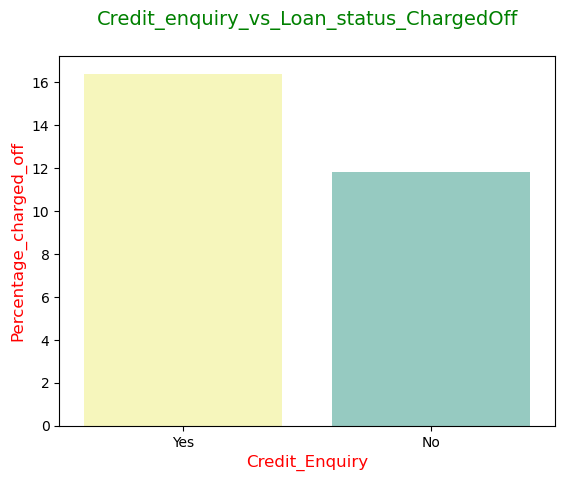

In [130]:
sns.barplot(data = credit_enquiry_vs_loan_status_sorted, y = 'percentage_charged_off', x = 'credit_enquiry',
            hue = 'percentage_charged_off', legend = False, palette = 'Set3')
plt.title("Credit_enquiry_vs_Loan_status_ChargedOff\n", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage_charged_off", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Credit_Enquiry", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

#### Variables: Public Records, Loan Status

In [132]:
## Create new column "public_record".
## 'Yes' if 'pub_rec' >0 else 'No'

loan["public_record"] = loan['pub_rec'].apply(lambda x: 'Yes' if x>0 else 'No')

In [133]:
## Creating pivot table with columns "public_record" and loan_status and aggregating on member count
## resetting index to have a dataframe

public_record_vs_loan_status_pivot = loan.pivot_table(index="public_record", columns='loan_status', values='member_id', aggfunc='count')
public_record_vs_loan_status = public_record_vs_loan_status_pivot.reset_index()
public_record_vs_loan_status

loan_status,public_record,Charged Off,Current,Fully Paid
0,No,5160,1094,31347
1,Yes,467,46,1603


In [134]:
## We need percentage of how many charged off in each term. We will let the NaN values be zero if any and then calculate %.
  
public_record_vs_loan_status['percentage_charged_off']= 100*public_record_vs_loan_status['Charged Off']/(public_record_vs_loan_status['Charged Off'] + 
                                                                               public_record_vs_loan_status['Current'] + 
                                                                                public_record_vs_loan_status['Fully Paid'])

public_record_vs_loan_status_sorted = public_record_vs_loan_status.sort_values('percentage_charged_off', ascending = False)
public_record_vs_loan_status_sorted

loan_status,public_record,Charged Off,Current,Fully Paid,percentage_charged_off
1,Yes,467,46,1603,22.069943
0,No,5160,1094,31347,13.723039


##### <font color = 'MAGENTA'> It appears that individuals with a "public record entry" greater than 0 tend to have a higher percentage of charge-offs.

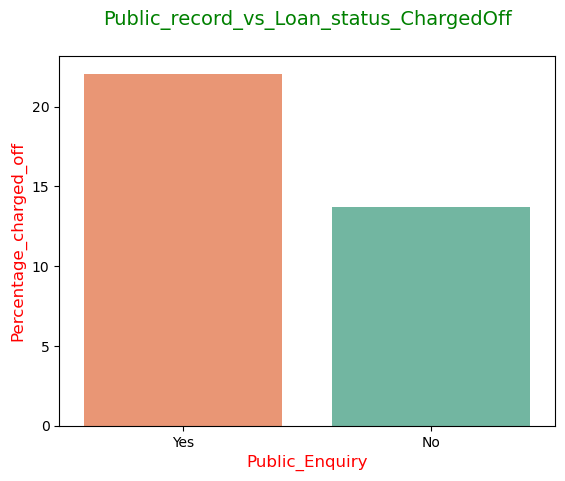

In [136]:
sns.barplot(data = public_record_vs_loan_status_sorted, y = 'percentage_charged_off', x = 'public_record',
            hue = 'percentage_charged_off', legend = False, palette = 'Set2')
plt.title("Public_record_vs_Loan_status_ChargedOff\n", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage_charged_off", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Public_Enquiry", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

#### Variables: Bankruptcy Record, Loan Status

In [138]:
## Create new column "bankruptcy".
## 'Yes' if 'pub_rec_bankruptcies' >0 else 'No'

loan["bankruptcy"] = loan['pub_rec_bankruptcies'].apply(lambda x: 'Yes' if x>0 else 'No')

In [139]:
## Creating pivot table with columns "bankruptcy" and loan_status and aggregating on member count
## resetting index to have a dataframe

bankruptcy_vs_loan_status_pivot = loan.pivot_table(index="bankruptcy", columns='loan_status', values='member_id', aggfunc='count')
bankruptcy_vs_loan_status = bankruptcy_vs_loan_status_pivot.reset_index()
bankruptcy_vs_loan_status

loan_status,bankruptcy,Charged Off,Current,Fully Paid
0,No,5259,1101,31676
1,Yes,368,39,1274


In [140]:
## We need percentage of how many charged off in each term. We will let the NaN values be zero if any and then calculate %.
  
bankruptcy_vs_loan_status['percentage_charged_off']= 100*bankruptcy_vs_loan_status['Charged Off']/(bankruptcy_vs_loan_status['Charged Off'] + 
                                                                               bankruptcy_vs_loan_status['Current'] + 
                                                                                bankruptcy_vs_loan_status['Fully Paid'])

bankruptcy_vs_loan_status_sorted = bankruptcy_vs_loan_status.sort_values('percentage_charged_off', ascending = False)
bankruptcy_vs_loan_status_sorted

loan_status,bankruptcy,Charged Off,Current,Fully Paid,percentage_charged_off
1,Yes,368,39,1274,21.891731
0,No,5259,1101,31676,13.826375


##### <font color = 'MAGENTA'> Members with a "Bankruptcy Record Entry" greater than 0 show a higher percentage of charge-offs.

#### Variables: No. of Delinq Incidence Last 2 Years, Loan Status

In [143]:
## Create new column "delinq_record".
## 'Yes' if 'delinq_2yrs' >0 else 'No'

loan["delinq_record"] = loan['delinq_2yrs'].apply(lambda x: 'Yes' if x>0 else 'No')

In [144]:
## Creating pivot table with columns "delinq_record" and loan_status and aggregating on member count
## resetting index to have a dataframe

delinq_vs_loan_status_pivot = loan.pivot_table(index="delinq_record", columns='loan_status', values='member_id', aggfunc='count')
delinq_vs_loan_status = delinq_vs_loan_status_pivot.reset_index()
delinq_vs_loan_status

loan_status,delinq_record,Charged Off,Current,Fully Paid
0,No,4936,1019,29450
1,Yes,691,121,3500


In [145]:
## We need percentage of how many charged off in each term. We will let the NaN values be zero if any and then calculate %.
  
delinq_vs_loan_status['percentage_charged_off']= 100*delinq_vs_loan_status['Charged Off']/(delinq_vs_loan_status['Charged Off'] + 
                                                                               delinq_vs_loan_status['Current'] + 
                                                                                delinq_vs_loan_status['Fully Paid'])

delinq_vs_loan_status_sorted = delinq_vs_loan_status.sort_values('percentage_charged_off', ascending = False)
delinq_vs_loan_status_sorted

loan_status,delinq_record,Charged Off,Current,Fully Paid,percentage_charged_off
1,Yes,691,121,3500,16.025046
0,No,4936,1019,29450,13.941534


##### <font color = 'MAGENTA'> Members with a "delinquency history in the past two years" exhibit a higher percentage of charge-offs.

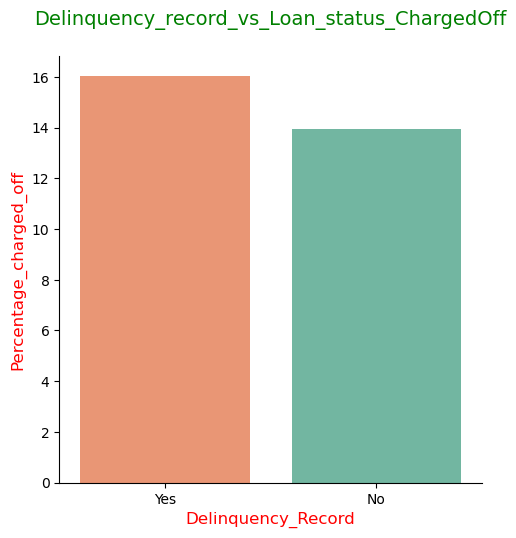

In [147]:
sns.catplot(data = delinq_vs_loan_status_sorted, y = 'percentage_charged_off', x = 'delinq_record',
            hue = 'percentage_charged_off', legend = False, palette = 'Set2', kind = 'bar')
plt.title("Delinquency_record_vs_Loan_status_ChargedOff\n", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Percentage_charged_off", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.xlabel("Delinquency_Record", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

#### Variables: Percentage Utilization of Credit Line, Loan Status

In [149]:
## Create new column "perc_util" with buckets <50%, <75%, <90%, >90%.
## column used 'revol_util'

loan["perc_util"] = loan['revol_util'].apply(lambda x: '<50%' if x<50 else '>=50%&<75%' if (50<= x <75) 
                                             else '>=75%&<90%' if (75<= x <90) else '>90%')

In [150]:
## Creating pivot table with columns "perc_util" and loan_status and aggregating on member count
## resetting index to have a dataframe

perc_util_vs_loan_status_pivot = loan.pivot_table(index="perc_util", columns='loan_status', values='member_id', aggfunc='count')
perc_util_vs_loan_status = perc_util_vs_loan_status_pivot.reset_index()
perc_util_vs_loan_status

loan_status,perc_util,Charged Off,Current,Fully Paid
0,<50%,2281,494,17364
1,>90%,682,93,2479
2,>=50%&<75%,1659,363,8622
3,>=75%&<90%,1005,190,4485


In [151]:
## We need percentage of how many charged off in each term. We will let the NaN values be zero if any and then calculate %.
  
perc_util_vs_loan_status['percentage_charged_off']= 100*perc_util_vs_loan_status['Charged Off']/(perc_util_vs_loan_status['Charged Off'] + 
                                                                               perc_util_vs_loan_status['Current'] + 
                                                                                perc_util_vs_loan_status['Fully Paid'])

perc_util_vs_loan_status_sorted = perc_util_vs_loan_status.sort_values('percentage_charged_off')
perc_util_vs_loan_status_sorted

loan_status,perc_util,Charged Off,Current,Fully Paid,percentage_charged_off
0,<50%,2281,494,17364,11.326282
2,>=50%&<75%,1659,363,8622,15.586246
3,>=75%&<90%,1005,190,4485,17.693662
1,>90%,682,93,2479,20.958820


##### <font color = 'MAGENTA'> As the percentage of credit line utilization rises, the percentage of charge-offs also increases.

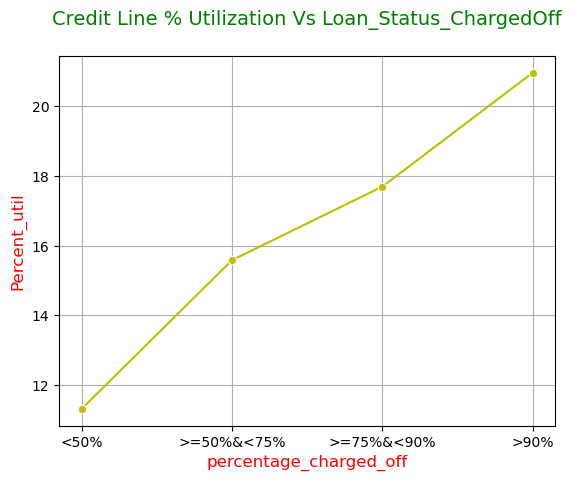

In [153]:
sns.lineplot(data = perc_util_vs_loan_status_sorted, y = 'percentage_charged_off', x = 'perc_util', marker = 'o', color ='y')
plt.title("Credit Line % Utilization Vs Loan_Status_ChargedOff\n", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("percentage_charged_off", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.ylabel("Percent_util", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.grid()
plt.show()

#### Variables: Interest Rate, Loan Status

In [155]:
## Create new column "interest" with buckets <7%, <10%, <12%, >15%.
## column used 'revol_util'

loan["interest"] = loan['int_rate'].apply(lambda x: '<7%' if x<7 else '>=7%&<10%' if (7<= x <10) 
                                             else '>=10%&<12%' if (10<= x <12) else '>=12&<15%' if (12<= x <15) else '>15%')

In [156]:
## Creating pivot table with columns "interest" and loan_status and aggregating on member count
## resetting index to have a dataframe

interest_vs_loan_status_pivot = loan.pivot_table(index="interest", columns='loan_status', values='member_id', aggfunc='count')
interest_vs_loan_status = interest_vs_loan_status_pivot.reset_index()
interest_vs_loan_status

loan_status,interest,Charged Off,Current,Fully Paid
0,<7%,174,2,3641
1,>15%,2090,534,5906
2,>=10%&<12%,1097,233,7497
3,>=12&<15%,1641,298,8279
4,>=7%&<10%,625,73,7627


In [157]:
## We need percentage of how many charged off in each term. We will let the NaN values be zero if any and then calculate %.
  
interest_vs_loan_status['percentage_charged_off']= 100*interest_vs_loan_status['Charged Off']/(interest_vs_loan_status['Charged Off'] + 
                                                                               interest_vs_loan_status['Current'] + 
                                                                                interest_vs_loan_status['Fully Paid'])

interest_vs_loan_status_sorted = interest_vs_loan_status.sort_values('percentage_charged_off')
interest_vs_loan_status_sorted

loan_status,interest,Charged Off,Current,Fully Paid,percentage_charged_off
0,<7%,174,2,3641,4.558554
4,>=7%&<10%,625,73,7627,7.507508
2,>=10%&<12%,1097,233,7497,12.427778
3,>=12&<15%,1641,298,8279,16.059894
1,>15%,2090,534,5906,24.501758


##### <font color = 'MAGENTA'> As the Interest Rate rises, the percentage of charge-offs also increases.

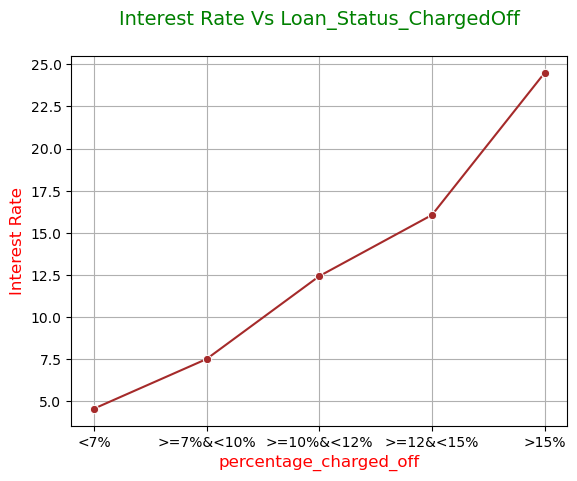

In [159]:
sns.lineplot(data = interest_vs_loan_status_sorted, y = 'percentage_charged_off', x = 'interest', marker = 'o', color ='brown')
plt.title("Interest Rate Vs Loan_Status_ChargedOff\n", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("percentage_charged_off", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.ylabel("Interest Rate", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.grid()
plt.show()

#### Variables: Debt to Income Ratio, Loan Status

In [161]:
## Create new column "dti_buck" with buckets <10%, <15%, <20%, >25%.
## column used 'dti'

loan["dti_buck"] = loan['dti'].apply(lambda x: '<10%' if x<10 else '>=10%&<15%' if (10<= x <15) 
                                             else '>=15%&<20%' if (15<= x <20) else '>=20&<25%' if (20<= x <25) else '>25%')

In [162]:
## Creating pivot table with columns "dti_buck" and loan_status and aggregating on member count
## resetting index to have a dataframe

dti_vs_loan_status_pivot = loan.pivot_table(index="dti_buck", columns='loan_status', values='member_id', aggfunc='count')
dti_vs_loan_status = dti_vs_loan_status_pivot.reset_index()
dti_vs_loan_status

loan_status,dti_buck,Charged Off,Current,Fully Paid
0,<10%,1626,297,11279
1,>25%,87,53,538
2,>=10%&<15%,1399,269,8225
3,>=15%&<20%,1394,284,7430
4,>=20&<25%,1121,237,5478


In [163]:
## We need percentage of how many charged off in each term. We will let the NaN values be zero if any and then calculate %.
  
dti_vs_loan_status['percentage_charged_off']= 100*dti_vs_loan_status['Charged Off']/(dti_vs_loan_status['Charged Off'] + 
                                                                               dti_vs_loan_status['Current'] + 
                                                                                dti_vs_loan_status['Fully Paid'])

dti_vs_loan_status_sorted = dti_vs_loan_status.sort_values('percentage_charged_off')
dti_vs_loan_status_sorted

loan_status,dti_buck,Charged Off,Current,Fully Paid,percentage_charged_off
0,<10%,1626,297,11279,12.316316
1,>25%,87,53,538,12.831858
2,>=10%&<15%,1399,269,8225,14.141312
3,>=15%&<20%,1394,284,7430,15.305226
4,>=20&<25%,1121,237,5478,16.398479


##### <font color = 'MAGENTA'> As the DTI continues to rise, the percentage of charge-offs, although not significantly, also tends to increase.

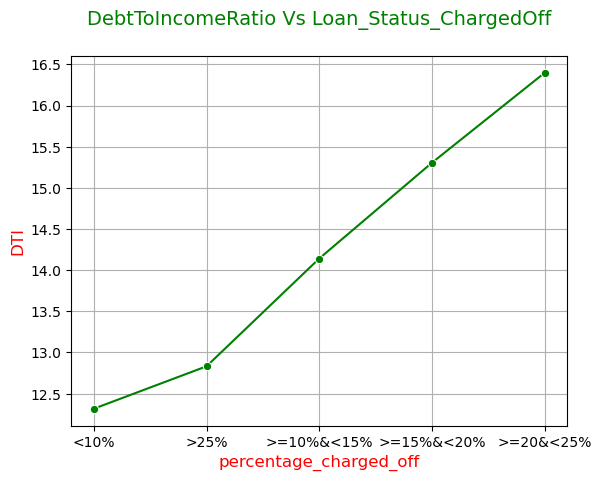

In [165]:
sns.lineplot(data = dti_vs_loan_status_sorted, y = 'percentage_charged_off', x = 'dti_buck', marker = 'o', color ='green')
plt.title("DebtToIncomeRatio Vs Loan_Status_ChargedOff\n", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("percentage_charged_off", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.ylabel("DTI", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Red'})
plt.grid()
plt.show()

#### Analysing Correlation between numeric variables

In [167]:
## correlation of Numeric Variables
## Creating a new dataframe of analysed numeric variables 

numeric_df = loan[nrv].copy(deep = False)
numeric_df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_util,pub_rec_bankruptcies
0,5000,10.65,162.87,24000.0,27.65,0,1,0,83.7,0.0
1,2500,15.27,59.83,30000.0,1.00,0,5,0,9.4,0.0
2,2400,15.96,84.33,12252.0,8.72,0,2,0,98.5,0.0
3,10000,13.49,339.31,49200.0,20.00,0,1,0,21.0,0.0
4,3000,12.69,67.79,80000.0,17.94,0,0,0,53.9,0.0


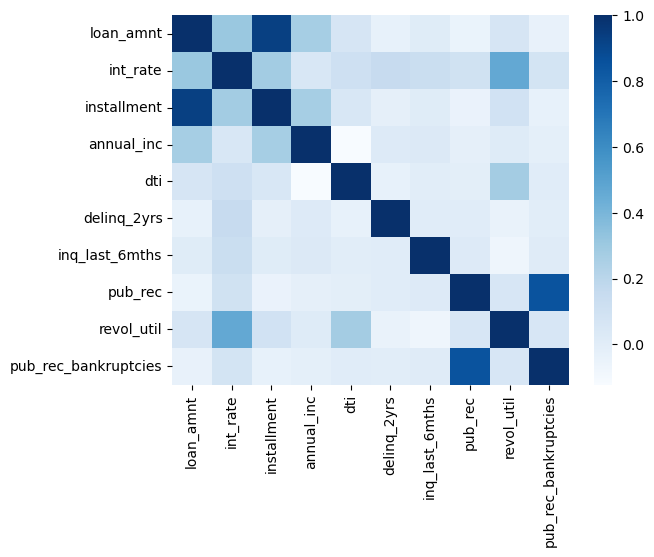

In [168]:
sns.heatmap(numeric_df.corr(), cmap = 'Blues')
plt.show()

In [169]:
numeric_df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_util,pub_rec_bankruptcies
loan_amnt,1.000000,0.309415,0.930288,0.271149,0.066439,-0.031864,0.009229,-0.051236,0.066149,-0.037180
int_rate,0.309415,1.000000,0.282703,0.053185,0.111162,0.157916,0.133013,0.097208,0.467168,0.082550
installment,0.930288,0.282703,1.000000,0.270874,0.054186,-0.019657,0.009722,-0.046532,0.095484,-0.034103
annual_inc,0.271149,0.053185,0.270874,1.000000,-0.122732,0.023083,0.033908,-0.018689,0.017926,-0.016801
dti,0.066439,0.111162,0.054186,-0.122732,1.000000,-0.034452,0.001405,-0.004621,0.277951,0.005691
delinq_2yrs,-0.031864,0.157916,-0.019657,0.023083,-0.034452,1.000000,0.008091,0.007463,-0.043095,0.003375
inq_last_6mths,0.009229,0.133013,0.009722,0.033908,0.001405,0.008091,1.000000,0.024802,-0.068585,0.016346
pub_rec,-0.051236,0.097208,-0.046532,-0.018689,-0.004621,0.007463,0.024802,1.000000,0.059069,0.847305
revol_util,0.066149,0.467168,0.095484,0.017926,0.277951,-0.043095,-0.068585,0.059069,1.000000,0.060635
pub_rec_bankruptcies,-0.037180,0.082550,-0.034103,-0.016801,0.005691,0.003375,0.016346,0.847305,0.060635,1.000000


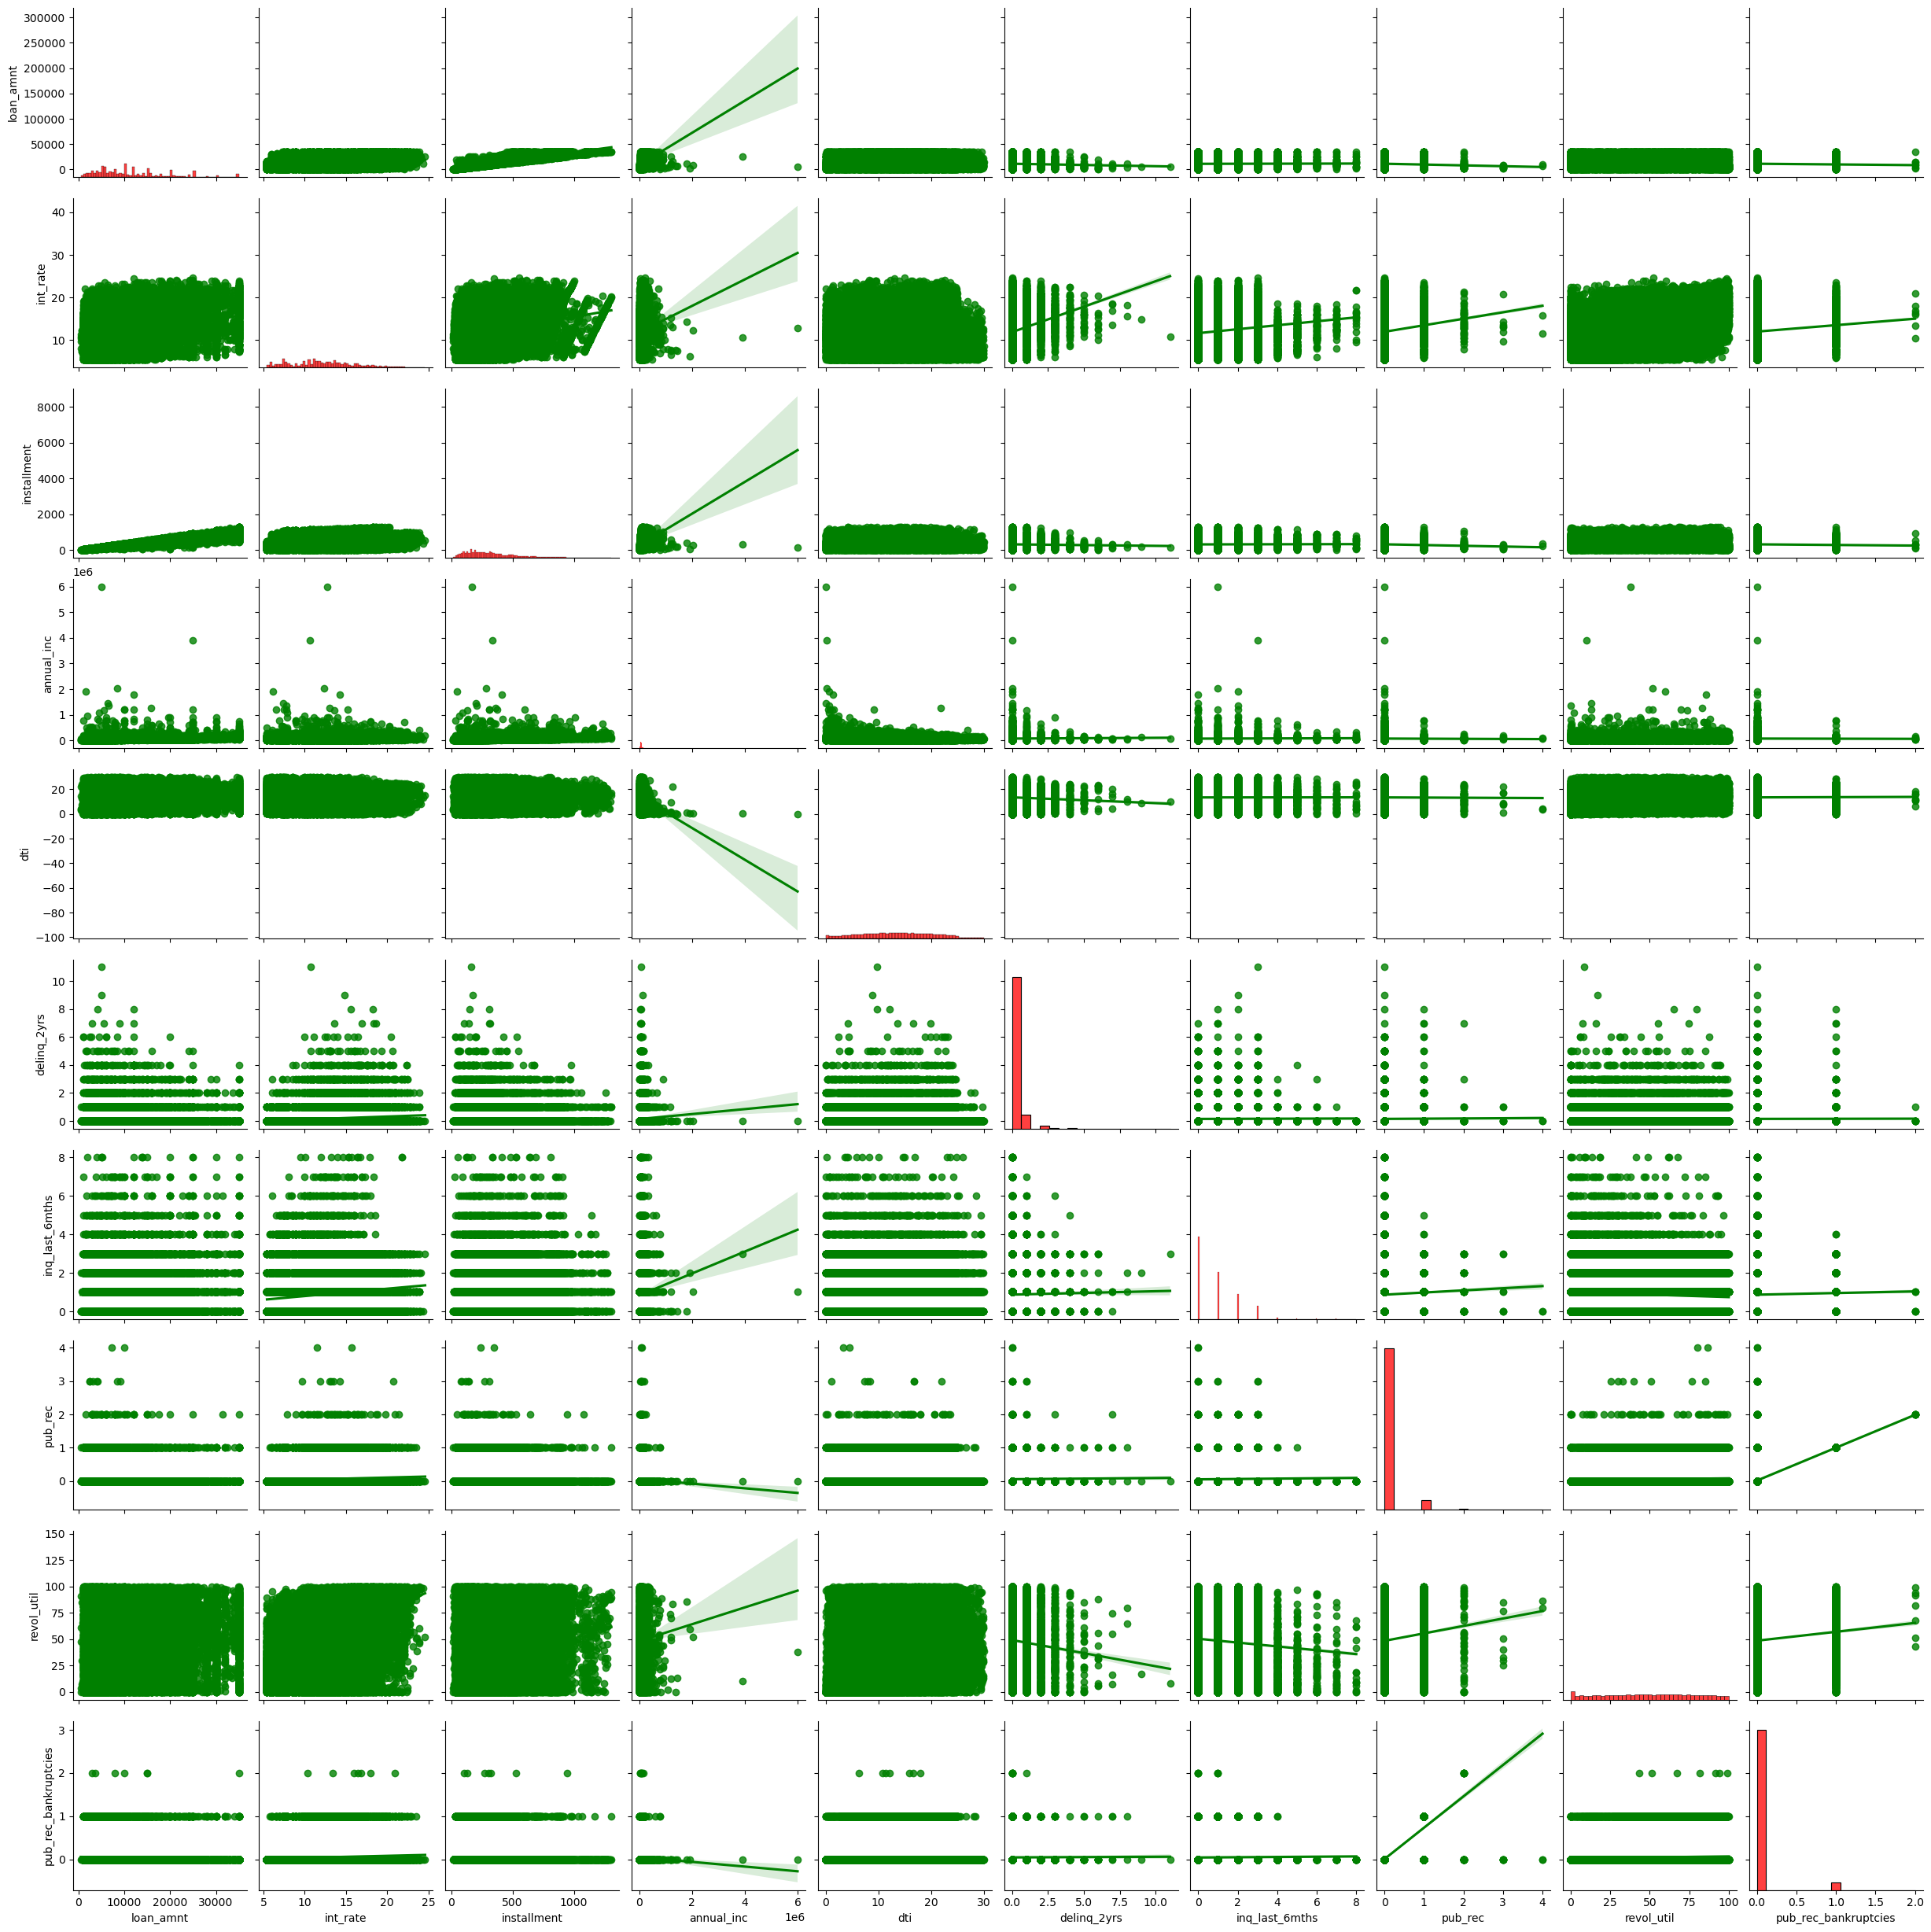

In [170]:
sns.pairplot(numeric_df, kind='reg',  diag_kws={'color':'red'}, plot_kws={'color':'green'})
plt.show()

##### <font color = 'RED'>It appears that the lending institution has overlooked important elements prior to approving loans. There seems to be virtually no connection between factors like bankruptcy history and loan amounts, debt-to-income ratio and loan amounts, delinquency history and loan amounts, and so on.

### CONCLUSION:

**Loan Term**: The organization offers a 36-month loan repayment period for approximately 78% of its clients. However, customers with a 60-month loan repayment term are generally more prone to default. This was further confirmed when analyzed alongside the length of employment. Regardless of how long a customer has been employed, those with a 60-month tenure have a greater likelihood of defaulting. Therefore company should have a stringent policy to minimize lending for 60 months tenure.<br>
<br>**Customer Grade**: Most customers fall into grades A or B. However, those in grades G, F, and E have a higher probability of defaulting. Therefore, the company should refrain from extending loans to customers in grades G, F, and E.<br>
<br>**Purpose of Loan**: The company should be wary or exercise additional caution when providing loans for small business ventures or renewable energy projects, as these are more prone to default. This was further confirmed when analyzed in conjunction with the length of employment.<br>
<br>**Customer Collateral**: It is noted that individuals whose home ownership status is labeled as unknown (other) tend to have a higher likelihood of default. The company should make sure to obtain appropriate collateral guarantees before providing loans.<br>
<br>**Credit History**: The company needs to exercise extreme caution when lending to customers who have any credit inquiries within the past six months, those with any public record entries, or individuals with a history of bankruptcy.<br>
<br>**Customer Behaviour**: The company should also make sure to review the delinquency history of a customer for at least two years before issuing loans. The analysis indicated that individuals with any delinquency history are more likely to default.<br>
<br>**Customer Financial Situation**: The organization needs to thoroughly evaluate the Debt-to-Income (DTI) ratio before making decisions on loan approvals or setting interest rates. The interest rates should not be excessively high. It has been noted that as both the DTI and interest rates rise, the likelihood of default also escalates.<br>
<br>**Customer Credit Limit**: Customers who make greater use of credit lines are at a higher risk of default. Consequently, the company should focus on this significant variable as well.<br>
<br>**Institution Research**: The lending institution has failed to consider crucial factors before granting loans. It appears that there is almost no correlation between aspects such as bankruptcy records and loan amounts, debt-to-income ratios and loan amounts, delinquency records and loan amounts, and so forth.<br>
<br>**Institution Loss**: Typically, around 14% to 15% of members default, which is quite significant.